In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/Users/gauravtyagi/Downloads/data/LANL-Earthquake-Prediction/train.csv',nrows=50000)


In [3]:
data.describe

<bound method NDFrame.describe of        acoustic_data  time_to_failure
0                 12         1.469100
1                  6         1.469100
2                  8         1.469100
3                  5         1.469100
4                  8         1.469100
5                  8         1.469100
6                  9         1.469100
7                  7         1.469100
8                 -5         1.469100
9                  3         1.469100
10                 5         1.469100
11                 2         1.469100
12                 2         1.469100
13                 3         1.469100
14                -1         1.469100
15                 5         1.469100
16                 6         1.469100
17                 4         1.469100
18                 3         1.469100
19                 5         1.469100
20                 4         1.469100
21                 2         1.469100
22                 6         1.469100
23                 7         1.469100
24              

In [4]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM

Using TensorFlow backend.


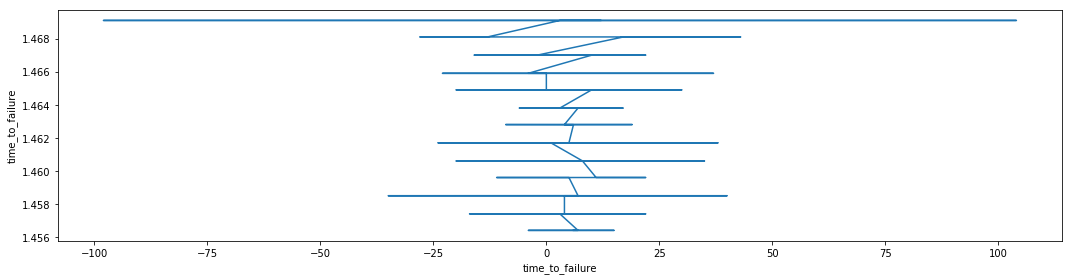

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
plt.plot(data.acoustic_data, data.time_to_failure)
plt.xlabel('time_to_failure')
plt.ylabel('time_to_failure')
plt.tight_layout()
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(data.acoustic_data,data.time_to_failure,test_size=0.2,random_state = 2)

In [8]:
y_train.shape

(40000,)

In [9]:
model=Sequential()

In [10]:
in_out_neurons = 1
hidden_neurons = 300

In [11]:
model.add(LSTM(input_dim=in_out_neurons,output_dim=hidden_neurons,return_sequences=False))
model.add(Dense(output_dim=in_out_neurons))
model.add(Activation("linear"))
model.compile(loss="mean_squared_error", optimizer="rmsprop")

/Users/gauravtyagi/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  """Entry point for launching an IPython kernel.
/Users/gauravtyagi/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=False, input_shape=(None, 1), units=300)`
  """Entry point for launching an IPython kernel.
/Users/gauravtyagi/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  


In [12]:
model.fit(X_train, y_train, batch_size=50, nb_epoch=10, validation_split=0.05)


/Users/gauravtyagi/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


ValueError: Error when checking input: expected lstm_1_input to have 3 dimensions, but got array with shape (40000, 1)